<a href="https://colab.research.google.com/github/Sameer513-code/Building-OCR/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import output
output.enable_custom_widget_manager()


In [2]:
from google.colab import drive
drive.mount('/content/MyDrive')


Mounted at /content/MyDrive


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# load csv
df = pd.read_csv("/content/MyDrive/MyDrive/math_symbols_100x100.csv", dtype={'label': str})  # <- Force label column to string

# split the dataset into labels and features
labels = df['label'].astype(str).values  # ensure that all labels column have only string data type
features = df.drop('label', axis=1).values / 255.0

# encode the characters
le = LabelEncoder()
labels = le.fit_transform(labels)

# spliting the data, 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# reshape for cnn input
X_train = X_train.reshape(-1, 100, 100, 1)
X_test = X_test.reshape(-1, 100, 100, 1)


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

#using the sequential model
model = models.Sequential([
          # below layer contains filters slides over the image and computes a dot product to produce a feature map
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    layers.MaxPooling2D((2, 2)),

          #these layers have no neurons, but they are like zooming in on the features and textures of the numbers
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(), # flatten the 2D image into 1D vector
    layers.Dense(128, activation='relu'), #trainiable layers, where the model actually learns!!!!
    layers.Dense(len(np.unique(y_train)), activation='softmax')  # output layer, for classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.3736 - loss: 2.1356 - val_accuracy: 0.7851 - val_loss: 0.7415
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8764 - loss: 0.4278 - val_accuracy: 0.8347 - val_loss: 0.5694
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9661 - loss: 0.1236 - val_accuracy: 0.8630 - val_loss: 0.5674
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9886 - loss: 0.0457 - val_accuracy: 0.8625 - val_loss: 0.6205
Epoch 5/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9917 - loss: 0.0327 - val_accuracy: 0.8675 - val_loss: 0.6517
Epoch 6/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9929 - loss: 0.0252 - val_accuracy: 0.8536 - val_loss: 0.7616
Epoch 7/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9924 - loss: 0.0253 - val_accuracy: 0.8467 - val_loss: 0.8705
Epoch 8/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9951 - loss: 0.0154 - val_acc

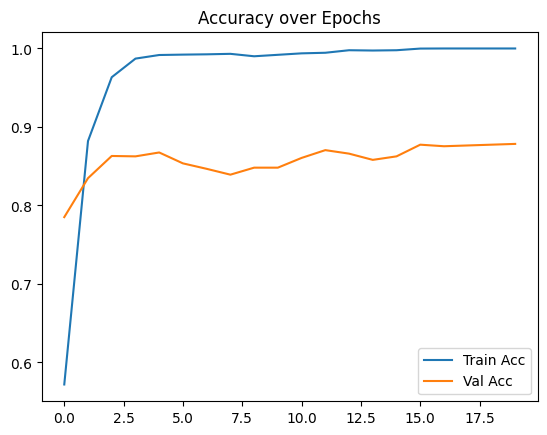

Final Train Accuracy: 1.0000
Final Validation Accuracy: 0.8784


In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Final Train Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")

